In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

In [24]:
Final = pd.read_csv("Concatnated.csv")

In [25]:
Final = np.array(Final[:292000])
print(Final.shape)

(292000, 447)


In [4]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]
print('Old:', Final.shape)
Final = Final.reshape(292000, 447)
print('Updated:',Final.shape)

Old: (292, 1000, 447)
Updated: (292000, 447)


In [26]:
X = Final[:, :446]
y = Final[:,446]

In [27]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(292000, 446)

In [11]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(0,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 4 Clusters is: 368541.93792921363
The innertia for : 5 Clusters is: 352815.42092537374
The innertia for : 6 Clusters is: 345259.8111979361
The innertia for : 7 Clusters is: 342931.7969401886
The innertia for : 8 Clusters is: 336106.4329153049
The innertia for : 9 Clusters is: 335748.43629746686
The innertia for : 10 Clusters is: 329871.88690706063
The innertia for : 11 Clusters is: 327707.26287374034
The innertia for : 12 Clusters is: 324523.02395823144
The innertia for : 13 Clusters is: 323200.2348353591
The innertia for : 14 Clusters is: 318190.85465680365
The innertia for : 15 Clusters is: 317304.98845019226
The innertia for : 16 Clusters is: 314705.1086870688
The innertia for : 17 Clusters is: 312954.6874820625
The innertia for : 18 Clusters is: 310096.01970228844
The innertia for : 19 Clusters is: 307975.14874955185


Text(0.5, 1.0, 'Inertia Plot per k')

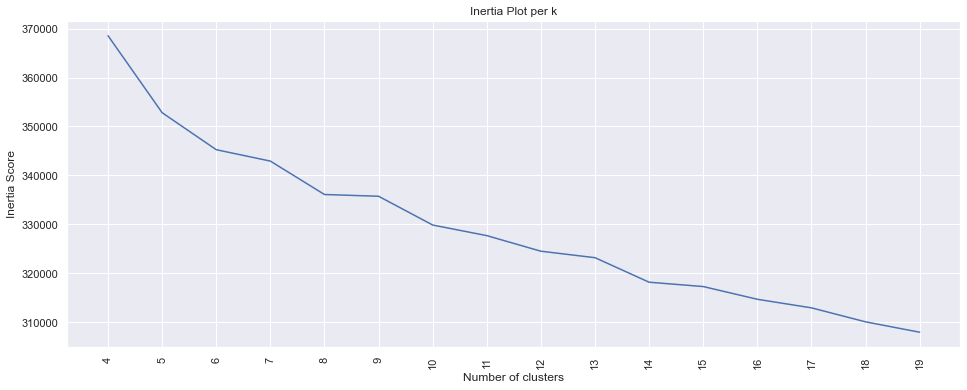

In [12]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
Labels = kmeans.labels_

In [29]:
Full = pd.concat([pd.DataFrame(y), pd.DataFrame(Labels)], ignore_index=True, axis=1)
Full = Full.rename(columns={0:'Labels', 1:'K_Labels'})

In [30]:
Full

,Labels,K_Labels
0,0.0,1
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1
...,...,...
291995,3.0,1
291996,3.0,1
291997,3.0,1
291998,3.0,1


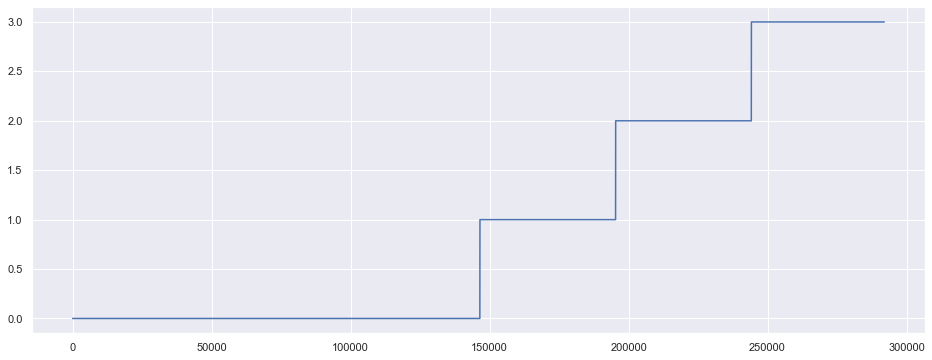

In [31]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
plt.plot(Full['Labels'])

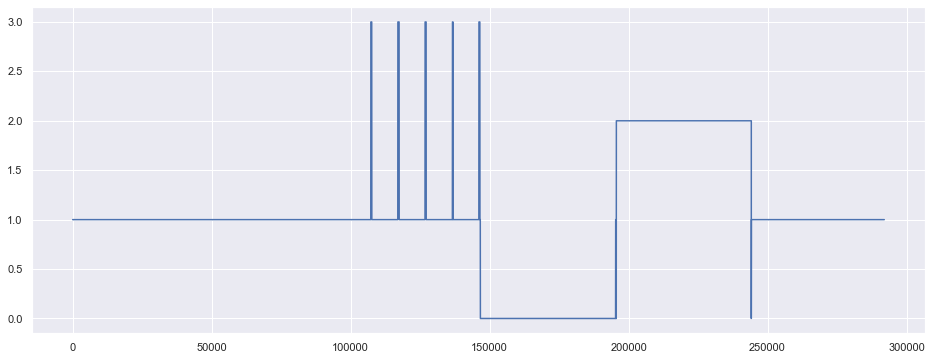

In [32]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
plt.plot(Full['K_Labels'])